In [2]:
from villas.dataprocessing.readtools import *
from villas.dataprocessing.timeseries import *
from villas.dataprocessing.timeseries import TimeSeries as ts
import matplotlib.pyplot as plt
import numpy as np
import dpsimpy
import re
import os

%matplotlib widget

#Define simulation scenario
time_step = 0.0001
final_time = 0.1 #0.006
simName = "EMT_Ph1_VS_R1_Diode"

dpsimpy.Logger.set_log_dir('logs/' + simName)

#Nodes
gnd = dpsimpy.emt.SimNode.gnd
n1 = dpsimpy.emt.SimNode("n1", dpsimpy.PhaseType.Single)
n2 = dpsimpy.emt.SimNode("n2", dpsimpy.PhaseType.Single)

#Components
vs = dpsimpy.emt.ph1.VoltageSource("vs")
vs.set_parameters(complex(1.,0.), 50.0);

load = dpsimpy.emt.ph1.Resistor("r1")
load.set_parameters(10.)

diode = dpsimpy.emt.ph1.Diode("Diode");

#Topology
vs.connect([gnd, n1]);
load.connect([n2, n1]);
diode.connect([gnd, n2]);

sys = dpsimpy.SystemTopology(50, [n1, n2], [vs, load, diode])

#Logging
logger = dpsimpy.Logger(simName)
logger.log_attribute("I_Diode", "i_intf", diode)
logger.log_attribute("V_Diode", "v_intf", diode)
logger.log_attribute("V_Resistor", "v_intf", load)
logger.log_attribute("V_VS", "v_intf", vs)

# Simulation
sim = dpsimpy.Simulation(simName)
sim.set_system(sys)
sim.set_time_step(time_step)
sim.set_final_time(final_time)
sim.set_domain(dpsimpy.Domain.EMT)
sim.set_solver(dpsimpy.Solver.ITERATIVEMNA)
sim.add_logger(logger)
sim.run()

30


[14:36:35.072157 EMT_Ph1_VS_R1_Diode_Solver warning] Linear solver configuration is not used!
[14:36:35.072535 EMT_Ph1_VS_R1_Diode_Solver warning] Linear solver configuration is not used!


2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


column number: 4
results length: 1000
real column names: ['I_Diode', 'V_Diode', 'V_Resistor', 'V_VS']
complex column names: []


Text(0, 0.5, 'Current [A]')

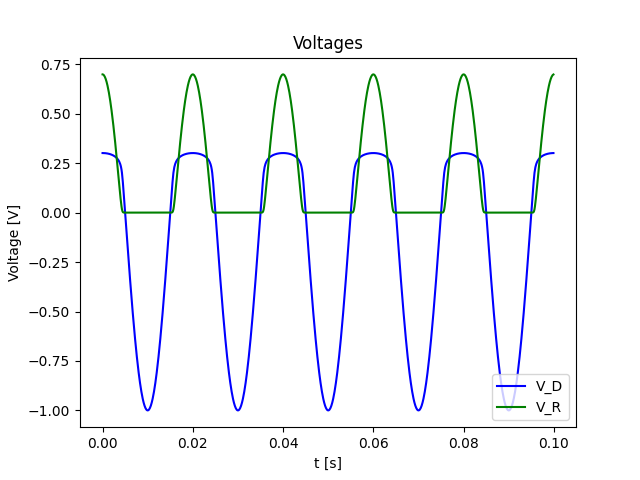

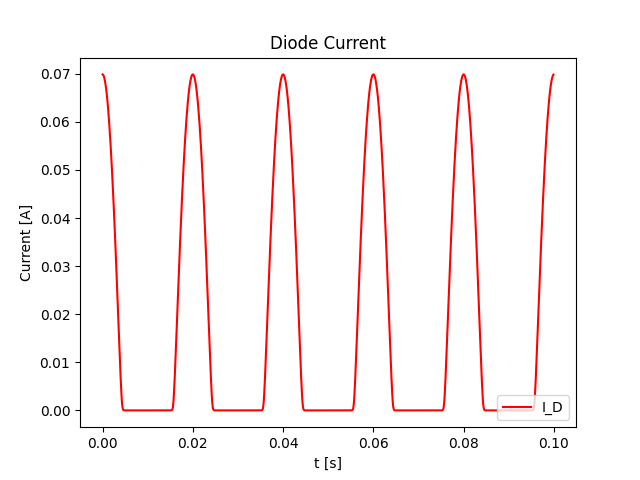

In [3]:
path_logfile = os.getcwd() + "/logs/" + simName + '/' + simName + '.csv'
ts_dpsim_EMT = read_timeseries_dpsim(path_logfile)

plt.close('all')
fig1 = plt.figure()

plt.plot(ts_dpsim_EMT['V_Diode'].time, ts_dpsim_EMT['V_Diode'].values, "b-", label='V_D')
plt.plot(ts_dpsim_EMT['V_Resistor'].time, ts_dpsim_EMT['V_Resistor'].values, "g-", label='V_R')
#plt.plot(ts_dpsim_EMT['V_VS'].time, ts_dpsim_EMT['V_VS'].values, "r-", label='V_VS')

#difference = ts_dpsim_EMT['V_VS'].values - (ts_dpsim_EMT['V_Resistor'].values+ts_dpsim_EMT['V_Diode'].values)
#plt.plot(ts_dpsim_EMT['V_VS'].time, difference, "b-", label='difference')

plt.legend(loc = 4)
#plt.legend(bbox_to_anchor=(1,1))

plt.title('Voltages')
plt.xlabel('t [s]')
plt.ylabel('Voltage [V]')

fig2 = plt.figure()

plt.plot(ts_dpsim_EMT['I_Diode'].time, ts_dpsim_EMT['I_Diode'].values, "r-", label='I_D')

plt.legend(loc = 4)

plt.title('Diode Current')
plt.xlabel('t [s]')
plt.ylabel('Current [A]')